### Problem 1.

### A)
For the 1 day average of cosmic rays we detect, I chose the value $X = 3$, and for the average number of gamma rays, $Y = 5$.
We create a Poisson distributions with those values for mu to get the the probabilities we would expect for seeing different numbers of events for a single day. Then we convolve that distribution with itself for each additional day of observations and plot them to see how they change.

In [1]:
from scipy.stats import poisson, norm, rayleigh
import numpy as np
import matplotlib.pyplot as plt

mu_x = 3
mu_y = 5

x = np.arange(0,
              10)
y = np.arange(poisson.ppf(0.01, mu_y),
              poisson.ppf(0.99, mu_y))


x_dist = poisson.pmf(x, mu_x)

x_dists = [x_dist]
for i in range(6):
    res = np.convolve(x_dists[i], x_dists[0])
    x_dists.append(res)

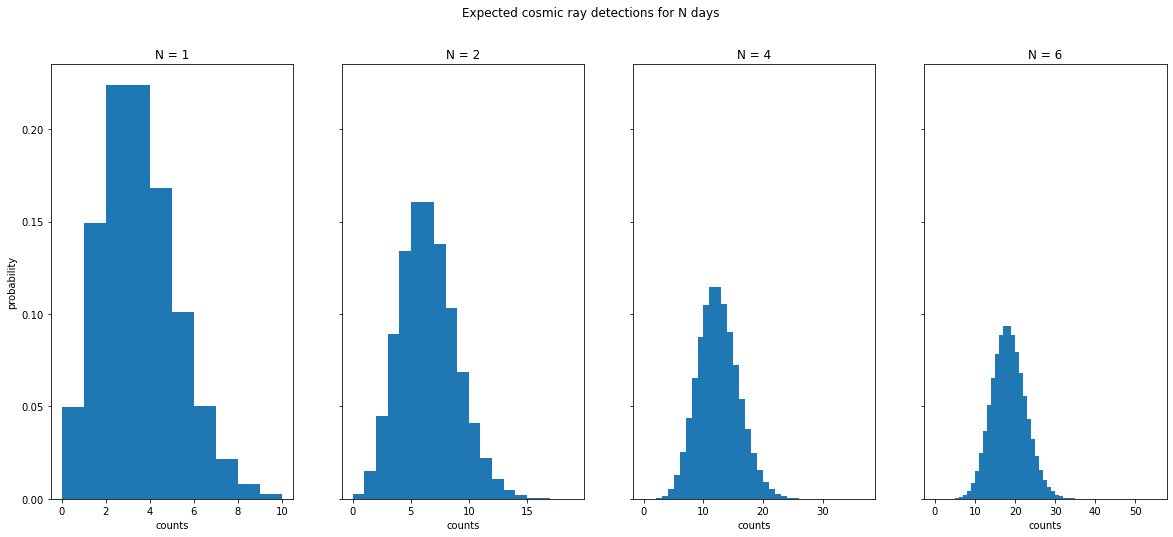

In [2]:
fig, ax = plt.subplots(1,4,figsize=(20,8), sharey=True)
ax[0].stairs(x_dists[0], fill=True)
ax[0].set_title('N = 1')

ax[1].stairs(x_dists[1], fill=True)
ax[1].set_title('N = 2')

ax[2].stairs(x_dists[3], fill=True)
ax[2].set_title('N = 4')

ax[3].stairs(x_dists[5], fill=True)
ax[3].set_title('N = 6')

ax[0].set_ylabel('probability')
ax[0].set_xlabel('counts')
ax[1].set_xlabel('counts')
ax[2].set_xlabel('counts')
ax[3].set_xlabel('counts')
plt.suptitle('Expected cosmic ray detections for N days')
plt.show()

As we integrate more days, the mean value for total expected detections is increasing, but the probability of getting any specific count decreases as the number of possible counts increases. This is because the sum of all probabilities is 1. The distribution also becomes more Gaussian-like as N increases.

### B)
To see how the distribution after 5 days compares to a Gaussian, we'll plot it with a Gaussian.

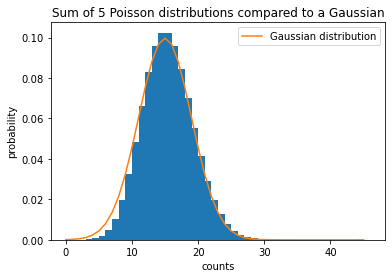

In [3]:
norm_x = np.arange(0,len(x_dists[4]))
norm_dist = norm.pdf(norm_x, loc=15, scale=4)
plt.stairs(x_dists[4], fill=True)
plt.plot(norm_dist, label='Gaussian distribution')
plt.title('Sum of 5 Poisson distributions compared to a Gaussian')
plt.ylabel('probability')
plt.xlabel('counts')
plt.legend()
plt.show()

While the distribution is getting closer to the shape of Gaussian, it is still clearly discrete, and it is not symmetric, unlike a Gaussian.

### C)
To get the average distributions, we re-scale the x-axis of the values to match that of the initial distribution.

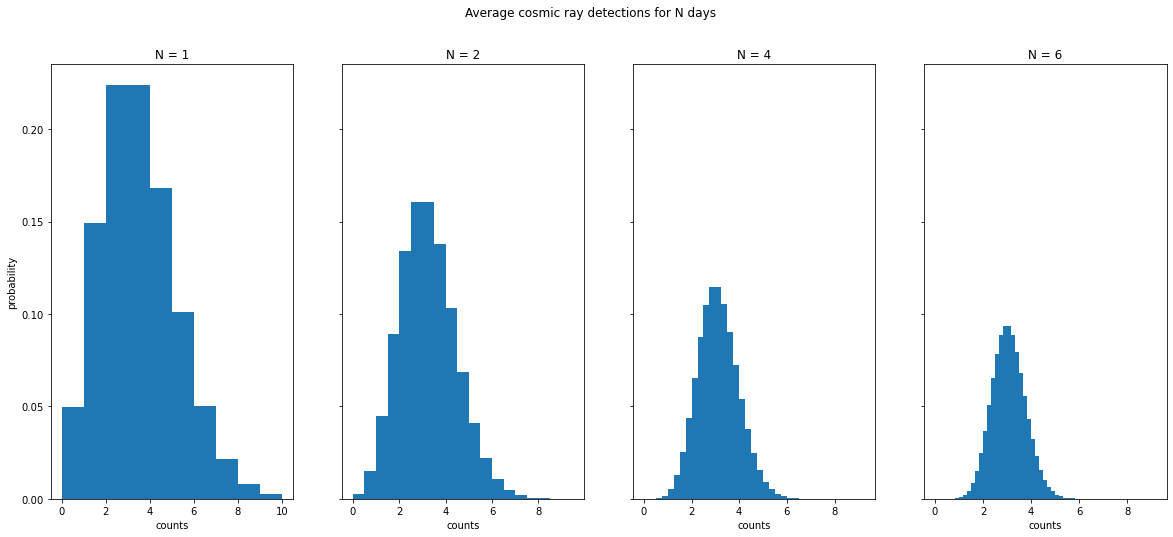

In [4]:
fig, ax = plt.subplots(1,4,figsize=(20,8), sharey=True)

ax[0].stairs(x_dists[0], fill=True)
ax[0].set_title('N = 1')

ax[1].stairs(x_dists[1], np.arange(0, len(x_dists[1])+1)/2, fill=True)
ax[1].set_title('N = 2')

ax[2].stairs(x_dists[3], np.arange(0, len(x_dists[3])+1)/4, fill=True)
ax[2].set_title('N = 4')

ax[3].stairs(x_dists[5], np.arange(0, len(x_dists[5])+1)/6, fill=True)
ax[3].set_title('N = 6')

ax[0].set_ylabel('probability')
ax[0].set_xlabel('counts')
ax[1].set_xlabel('counts')
ax[2].set_xlabel('counts')
ax[3].set_xlabel('counts')
plt.suptitle('Average cosmic ray detections for N days')
plt.show()

Like in part B, the distribution gets wider and shorter while getting more Gaussian-like, as the central limit theorem says that normalized sums of distributions tend towards a Gaussian distribution. But unlike in part B, the mean remains the same regardless of how many times they are averaged together.

### D)

For 10 days, with an average number of gamma rays of 5, we get a total of 50 gamma rays. To find the probability that these detections were from the background, we take the sum of 5 days and find the probability of getting that number of detections or more. Then we use norm.ppf() to convert this probability to a sigma value.

In [5]:
dist = x_dist
for i in range(9):
     dist = np.convolve(dist, x_dist)
p = dist[50:].sum()
sigma = norm.ppf(p)
print(f'The probability is {100*p:0.3f}%, which is a value of {abs(sigma):0.3f} sigma.')

The probability is 0.038%, which is a value of 3.370 sigma.


### Problem 2.

### A)

In [6]:
x = np.arange(0,20, 0.1)
d = rayleigh.pdf(x)
ds = [d]
for i in range(100):
    res = np.convolve(ds[i], d)
    ds.append(res)

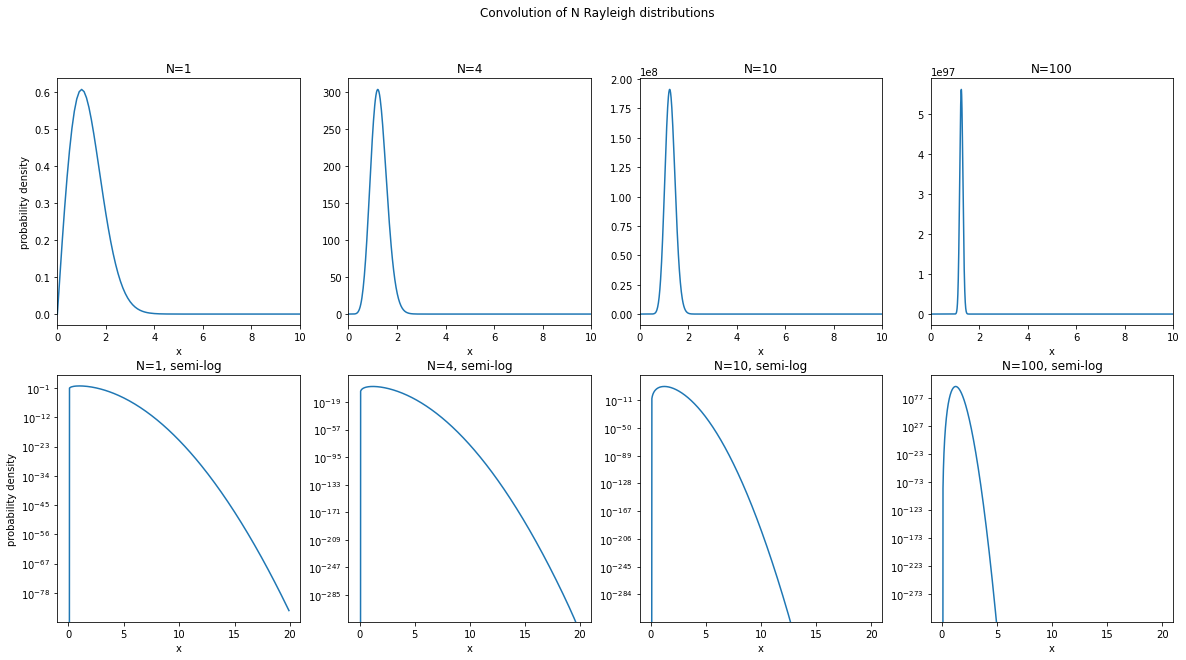

In [7]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
ax[0,0].plot(x, d)
ax[0,0].set_xlim(0,10)
ax[0,0].set_title('N=1')

x4 = np.linspace(0, 20, len(ds[3]))
ax[0,1].plot(x4, ds[3])
ax[0,1].set_xlim(0,10)
ax[0,1].set_title('N=4')

x10 = np.linspace(0, 20, len(ds[9]))
ax[0,2].plot(x10, ds[9])
ax[0,2].set_xlim(0,10)
ax[0,2].set_title('N=10')

x100 = np.linspace(0, 20, len(ds[99]))
ax[0,3].plot(x100, ds[99])
ax[0,3].set_xlim(0,10)
ax[0,3].set_title('N=100')

ax[1,0].plot(x, d)
ax[1,0].set_title('N=1, semi-log')
ax[1,1].plot(x4, ds[3])
ax[1,1].set_title('N=4, semi-log')
ax[1,2].plot(x10, ds[9])
ax[1,2].set_title('N=10, semi-log')
ax[1,3].plot(x100, ds[99])
ax[1,3].set_title('N=100, semi-log')

for i in range(4):
    ax[1,i].set_yscale('log')
    ax[1,i].set_xlabel('x')
for i in range(4):
    ax[0,i].set_xlabel('x')

ax[0,0].set_ylabel('probability density')
ax[1,0].set_ylabel('probability density')

plt.suptitle('Convolution of N Rayleigh distributions')
plt.show()

### B)

As more Rayleigh distributions are averaged, they become narrower, with a higher probability density near the mean. In the regular plots, they look Gaussian, but as can be seen in the semi-log plots, even after convolving 100 distributions, they still aren't quite Gaussian. Instead of being a parabola, they have an asymmetric shape with a flat side on the left. 

### 3.
### A)
I'll use a Gaussian distribution with a mean of $\mu =0$ and scale of $\sigma=0.6$ to represent the background, and for the strength of a signal I'll use $Y=3.5$.

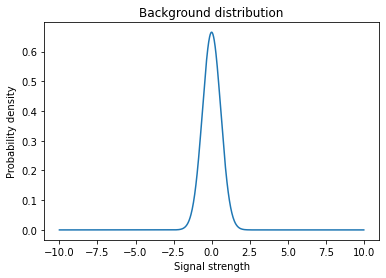

In [8]:
x = np.linspace(-10, 10, 1000)
d = norm.pdf(x, loc=0, scale=0.6)
plt.plot(x,d)
plt.title('Background distribution')
plt.xlabel('Signal strength')
plt.ylabel('Probability density')
plt.show()

In [9]:
p = 1 - norm.cdf(3.5, loc=0, scale=0.6)
print(f'The probability is {p:0.3e}, or {abs(norm.ppf(p)):0.3f} sigma.')

The probability is 2.717e-09, or 5.833 sigma.


With a probability of 5.833$\sigma$ this meets the $5\sigma$ threshold and would be a confirmed detection.

### B)

Instead of looking for the probability of the background looking like a signal in one pixel, we need to know the probability that there will be a false detection in any of the 10k pixels. This means we need probability of any one pixel OR any other, so the sum of the probabilities minus the product of the probabilities.

$$P(A_1 or A_2 or... A_i) = \Sigma P(A_i) - \Pi P(A_i)$$

$$P_{total} = 10000 \times P - P^{10000}$$

Since the probability is small, $ P_{total} \approx 10000 \times P $.

### C)

In [10]:
N = 10000
p_sum = N*p
print(f'The probability is {p_sum:0.3e}, or {abs(norm.ppf(p_sum)):0.3f} sigma.')

The probability is 2.717e-05, or 4.036 sigma.


This same signal out of 10k pixels no longer meets the detection threshold, as it's only ~4$\sigma$.

### 4.
### A)

In [11]:
sigma_5 = norm.sf(5) 
p = norm.isf(sigma_5, loc=10, scale=0.6)
print(f'The value needed for a significance of 5 sigma with the initial distribution is {p}.')

The value needed for a significance of 5 sigma with the initial distribution is 13.0.


### B)

For Version 2, we need a probability of 1/10000th of 5$\sigma$ in the first version.

In [12]:
sigma_5 = norm.sf(5)/10000
p = norm.isf(sigma_5, loc=10, scale=0.6)
print(f'The value needed for a significance of 5 sigma with the initial distribution is {p:0.3f}.')

The value needed for a significance of 5 sigma with the initial distribution is 13.930.


### C)
The signal only needs to be 0.930, or ~7%, brighter with a trial factor of 10k. The difference is so low because the values are in the wings of the distribution, as can be seen in the plot in part A, wher moving further away from the mean becomes rarer and rarer. This means even a small change to the right can be a large decrease in probability.

### D)

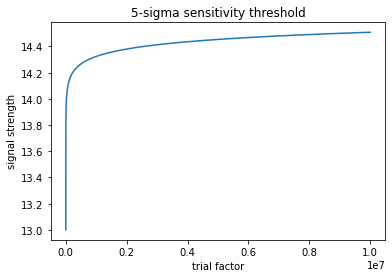

In [13]:
x = np.arange(1,10000000)
plt.plot(x, norm.isf(norm.sf(5)/x, loc=10, scale=0.6))
plt.title('5-sigma sensitivity threshold')
plt.xlabel('trial factor')
plt.ylabel('signal strength')
plt.show()

The signal strength needed for 5$\sigma$ increases quickly for low trial factors, but then plateaus for higher values, with a threshold of still only 14.5 with a trial factor of 10 million.